# Assignment 4 - Minimization of Functionals
---
Group 3:
* Jiye Lee
* Eduardo Venegas Hernández
---

The goal of this task is to infer a smooth surface from sparse data points using minimization
of functionals.

1. Use the function matread from MAT.jl to load the dataset D from the file laserdata.mat.
It contains data from a laser scanner, which sampled an environment during a 360◦
scan at a fixed height, resulting in a 1D profile. Each data point indicates the distance
to the next object for a given angle α. If no reliable result could be obtained for a
specific angle, a distance of dα = 0 is recorded in the dataset.

2. Use the temporal discretization of the Euler-Lagrange equation given below in order
to implement an iterative procedure to find the target function u(α). This potential
function approximates the data points dα and at the same time yields a smooth result.
Use the surface membrane property as a constraint to determine the function u:
∂u/∂t = κα · (d − u) + λ*(∂^2/(∂α)^2)*u
To execute the potential function we discretize it as a 1-step Euler scheme with
∂u/∂t ≈ (ut+∆t−ut)/∆t, which yields the iteration rule:
u(t+1) = ut + ∆t * (κα · (d − ut) + λ*(∂2/∂α2)*ut)

Use a fixed regularization parameter of λ = 1. For each angle α at which a data point dα
is available, use κα = 1, otherwise κα = 0. The step size of the iterative solution scheme
is ∆t = 0.1. Initialize the function approximation u(α) for the membrane with a constant
function using the average distance value of all non-zero data points.
In order to get a good approximation, iterate for 30.000 steps and visualize the intermediate
results after each 500-step interval. Use polar coordinates in order to generate the visualization,
in order to get an idea about the hypothesized outline of the walls. In order to visualize the
temporal sequence, use an appropriate color scheme for the different function approximations
over time (all intermediate results should be shown in a single plot). Especially, make sure
that the final result is easily recognizable.

* Note that in order to implement the constraint condition of the Euler-Lagrange equation
for this task, only a one-dimensional Laplace filter is required, [ 1 −2 1 ] .
* The derivatives can be calculated with the function imfilter. Use "circular" boundary condition.

1. Use the function matread from the package MAT.jl to load the dataset D from the file laserdata.mat.

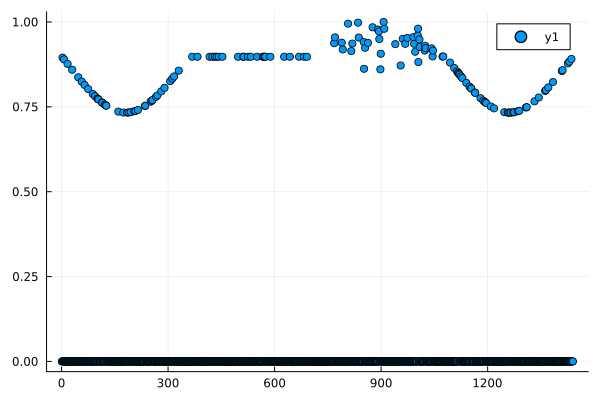

In [1]:
# import libraries
using MAT
using Images
using Statistics
using Plots


data = vec(matread("laserdata.mat")["D"])
scatter(data)

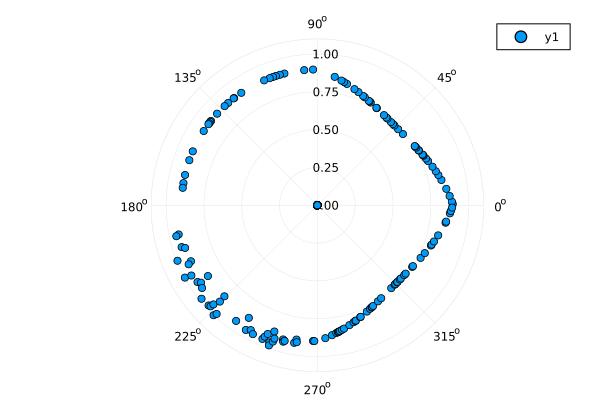

In [2]:
scatter(range(0, 2π, length=length(data)), data, projection=:polar)

2. Implement the iterative procedure to find the target function u(α) using the Euler-Lagrange equation and the surface membrane property as a constraint.

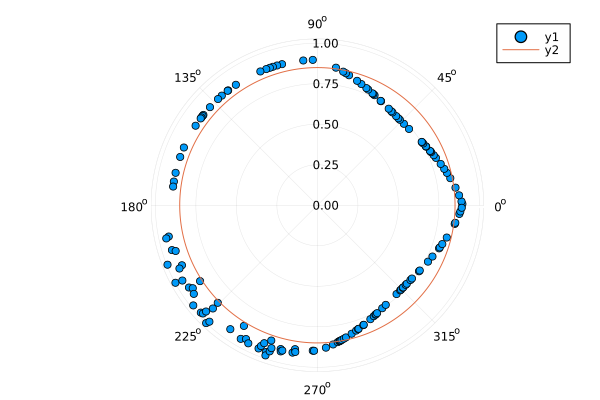

In [4]:
as = range(0, 2π, length=length(data))
ks = data .!= 0
us = ones(size(data)) * (sum(data) / sum(ks))

scatter(as[ks], data[ks], projection=:polar)
plot!(as, us, projection=:polar)

Membrane Equation
- Smoothness constraint: 2nd derivative of surface should be small

In [11]:
d2u_d2a(u) = imfilter(u, [1; -2; 1.], "circular")

d2u_d2a (generic function with 1 method)

Two components:
- data term: bring membrane closer to data
- regularization term: keep membrane smooth

In [9]:
membrane(u, d, ks, λ=1.0, ∆t=0.1) = u + ∆t * (ks .* (d - u) + λ * d2u_d2a(u))

membrane (generic function with 3 methods)

Iteration

In [7]:
# Iteration

function plotregularization(data, stepfun; init=nothing, steps=30_000, plotevery=500)
  as = range(0, 2π, length=length(data))
  ks = data .!= 0
  if isnothing(init)
    us = ones(size(data)) * (sum(data) / sum(ks))
  else
    us = init
  end
  anim = Animation()
  for s in range(0, steps)
    if s % plotevery == 0
      scatter(as[ks], data[ks], label="d", projection=:polar)
      plot!(as, us, label="u", projection=:polar)
      title!("Iteration $s")
      frame(anim)
    end
    us = stepfun(us, data, ks)
  end
  return anim, us
end

plotregularization (generic function with 1 method)

Result

In [12]:
animation, us_mem = plotregularization(data, membrane)

(Animation("/tmp/jl_iC8jJI", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000052.png", "000053.png", "000054.png", "000055.png", "000056.png", "000057.png", "000058.png", "000059.png", "000060.png", "000061.png"]), [0.8926330736293717, 0.8930918563092727, 0.8935506389891731, 0.8925363811524796, 0.8915221233157855, 0.890507865479091, 0.889493607642396, 0.888198698625019, 0.8869037896076414, 0.8856088805902633  …  0.8842967551923644, 0.8855052361998643, 0.8867137172073638, 0.8879221982148627, 0.8891306792223612, 0.8903391602298592, 0.8907979429097627, 0.8912567255896657, 0.8917155082695682, 0.8921742909494702])

┌ Info: Saved animation to /home/lalo/Uni/CV/Assignment 4/membrane.gif
└ @ Plots /home/lalo/.julia/packages/Plots/qgrW8/src/animation.jl:149


Plots.AnimatedGif("/home/lalo/Uni/CV/Assignment 4/membrane.gif")
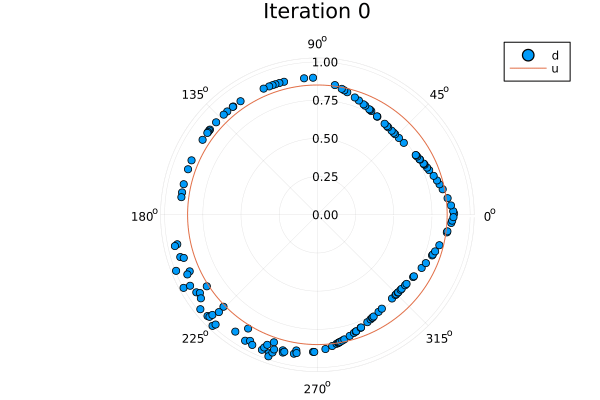

In [13]:
gif(animation, "membrane.gif", fps=10)